In [1]:
%reload_ext autoreload
%autoreload
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
import os

In [3]:
os.getcwd()

'/home/cross/Bureau/Alex/course-v3-master/nbs/dl1'

In [4]:
bs = 64

In [5]:
from pathlib import Path
path = Path('/home/cross/Bureau/Alex/course-v3-master/data/cell_images/')
path

PosixPath('/home/cross/Bureau/Alex/course-v3-master/data/Swatch_Group')

In [ ]:
path_sain = path/"Parasitized"
path_malade = path/"Uninfected"
path_sain

In [7]:
fnames = get_image_files(path)
type(fnames_sain)

list

In [ ]:
fnames_sain[:5]

In [39]:
fnames_malade = get_image_files(path_malade)
type(fnames_malade)

list

In [40]:
fnames_malade[:5]

[PosixPath('/home/cross/Bureau/Alex/course-v3-master/data/cell_images/Uninfected/C105P66ThinF_IMG_20150924_100655_cell_64.png'),
 PosixPath('/home/cross/Bureau/Alex/course-v3-master/data/cell_images/Uninfected/C58P19thinF_IMG_20150802_122520_cell_161.png'),
 PosixPath('/home/cross/Bureau/Alex/course-v3-master/data/cell_images/Uninfected/C216ThinF_IMG_20151106_134733_cell_123.png'),
 PosixPath('/home/cross/Bureau/Alex/course-v3-master/data/cell_images/Uninfected/C106P67ThinF_IMG_20150924_102826_cell_39.png'),
 PosixPath('/home/cross/Bureau/Alex/course-v3-master/data/cell_images/Uninfected/C201ThinF_IMG_20150930_143411_cell_134.png')]

In [68]:
# en une ligne de code on vréé un val split avec cetteligne magnifique

data = ImageDataBunch.from_folder(path, train = ".", valid_pct = 0.2, ds_tfms = get_transforms(), size = 224).normalize(imagenet_stats)

In [70]:
data.classes

['Parasitized', 'Uninfected']

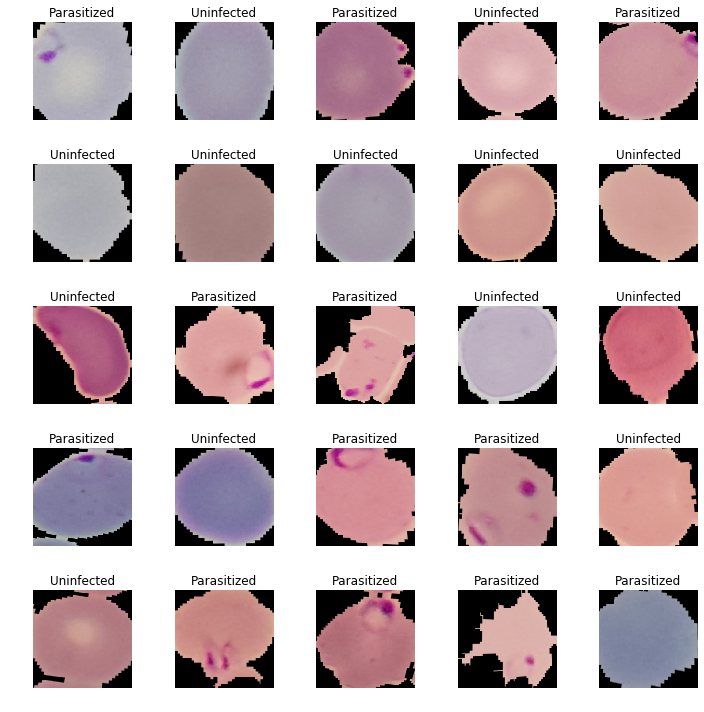

In [99]:
data.show_batch(rows=5, figsize=(10,10))

In [100]:
# les noés des labels sont appelés les classes
print(data.classes)
len(data.classes)

['Parasitized', 'Uninfected']


2

In [73]:
data.c

2

In [101]:
### train resnet34
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [75]:
# on verra plus tard d autres attributs
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.227882,0.153429,0.057884
2,0.169511,0.123636,0.049719
3,0.155198,0.106502,0.039194
4,0.137097,0.107244,0.041735


In [76]:
learn.save('etape1')

In [78]:
# resultats
# on regarde l interpretation du modele

In [77]:
# learn object knows 2 things : what s your data and what s your model
interp = ClassificationInterpretation.from_learner(learn)

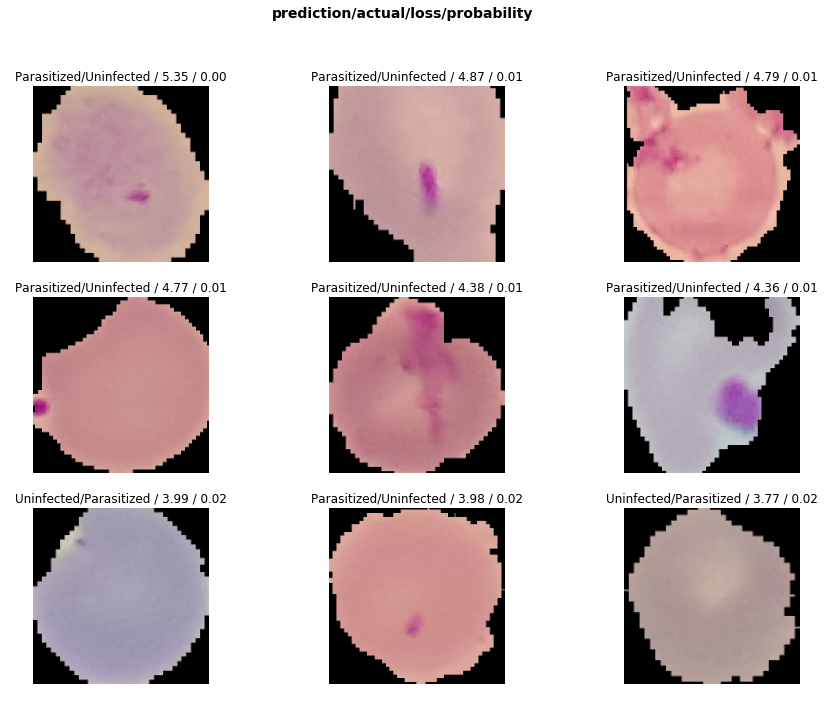

In [79]:
# on plot les choses qui ont la plus grande fonction de perte ( qui sont les plus sûr que qqch est 
# sûre alors qu elle est fausse)
interp.plot_top_losses(9, figsize=(15,11))

In [80]:
interp.most_confused(min_val=2)

[('Uninfected', 'Parasitized', 118), ('Parasitized', 'Uninfected', 112)]

In [102]:
learn.load('etape1');

In [103]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


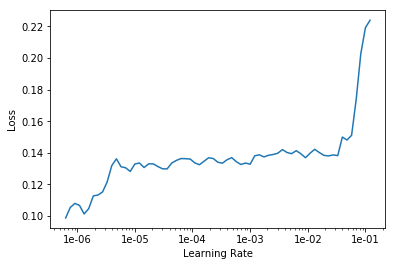

In [104]:
learn.recorder.plot()

In [112]:
# unfreezing et tuning
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=1e-4)

epoch,train_loss,valid_loss,error_rate
1,0.175357,0.120838,0.039013
2,0.128853,0.096122,0.035202


In [108]:
learn.save("resnet34_etape1")

In [113]:
learn.load("resnet34_etape1")

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (22047 items)
[Category Parasitized, Category Parasitized, Category Parasitized, Category Parasitized, Category Parasitized]...
Path: /home/cross/Bureau/Alex/course-v3-master/data/cell_images
x: ImageItemList (22047 items)
[Image (3, 169, 145), Image (3, 94, 97), Image (3, 148, 115), Image (3, 136, 109), Image (3, 136, 130)]...
Path: /home/cross/Bureau/Alex/course-v3-master/data/cell_images;
Valid: LabelList
y: CategoryList (5511 items)
[Category Uninfected, Category Parasitized, Category Uninfected, Category Parasitized, Category Uninfected]...
Path: /home/cross/Bureau/Alex/course-v3-master/data/cell_images
x: ImageItemList (5511 items)
[Image (3, 124, 121), Image (3, 136, 121), Image (3, 121, 142), Image (3, 130, 148), Image (3, 112, 109)]...
Path: /home/cross/Bureau/Alex/course-v3-master/data/cell_images;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3,

In [114]:
interp = ClassificationInterpretation.from_learner(learn)


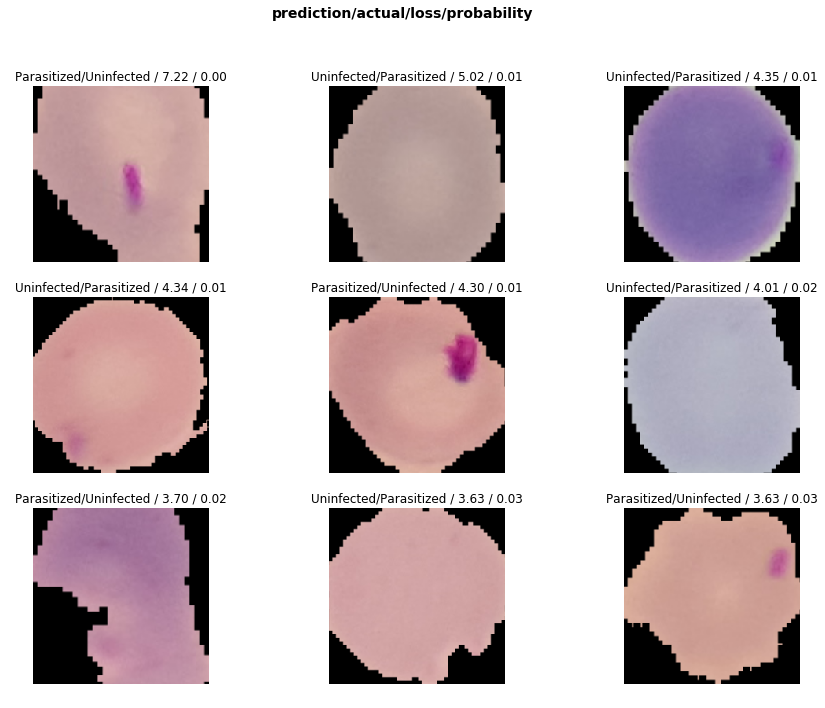

In [115]:
interp.plot_top_losses(9, figsize=(15,11))

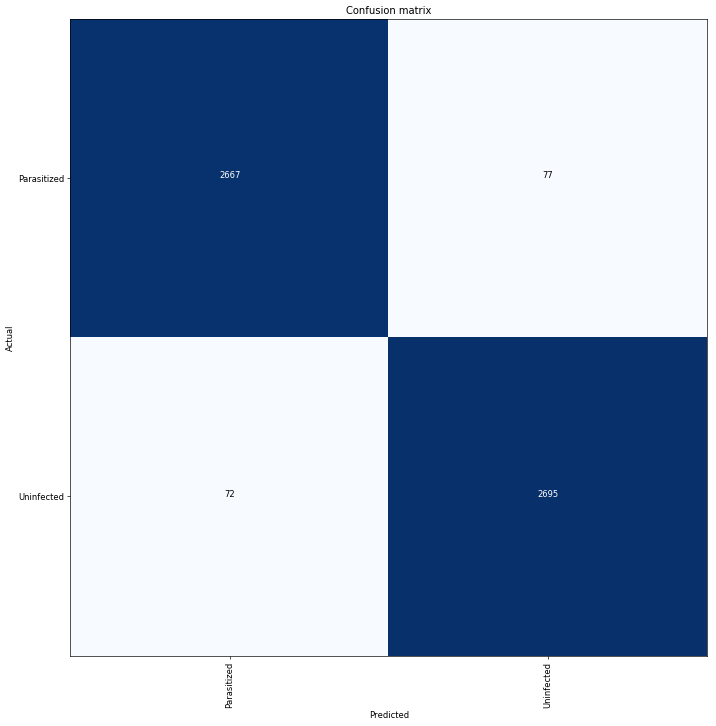

In [116]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [86]:
### ok pas super mega top mais pas mal quand mm. 
### Essayons Resnet50

In [91]:
learn = create_cnn(data, models.resnet50, metrics=error_rate)


In [92]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.201264,0.143573,0.050626
2,0.161329,0.109875,0.039194
3,0.130886,0.098858,0.038106
4,0.117880,0.093807,0.034839


In [97]:
learn.save("Resnet50_etape1")

In [94]:
interp = ClassificationInterpretation.from_learner(learn)

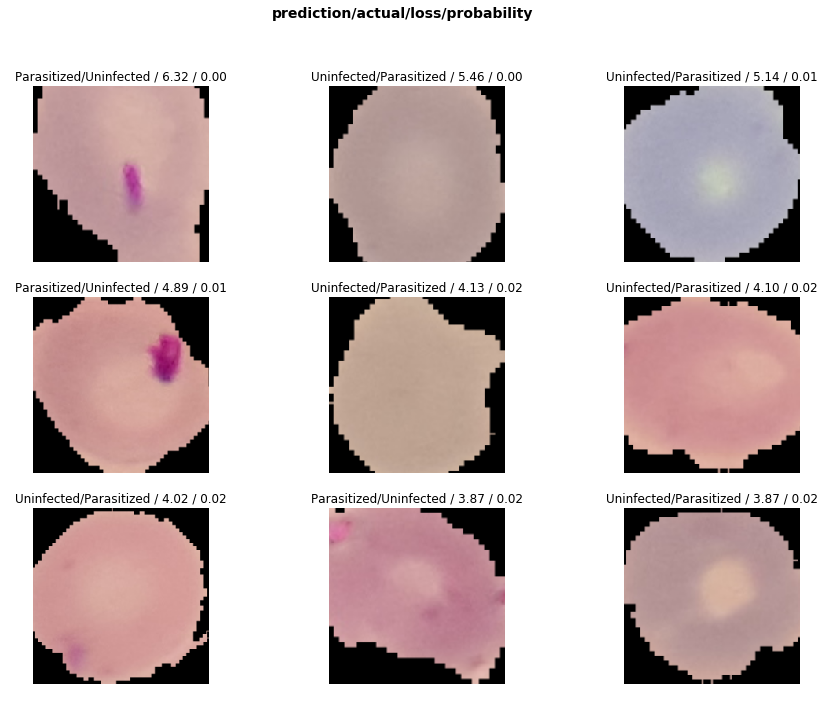

In [95]:
interp.plot_top_losses(9, figsize=(15,11))

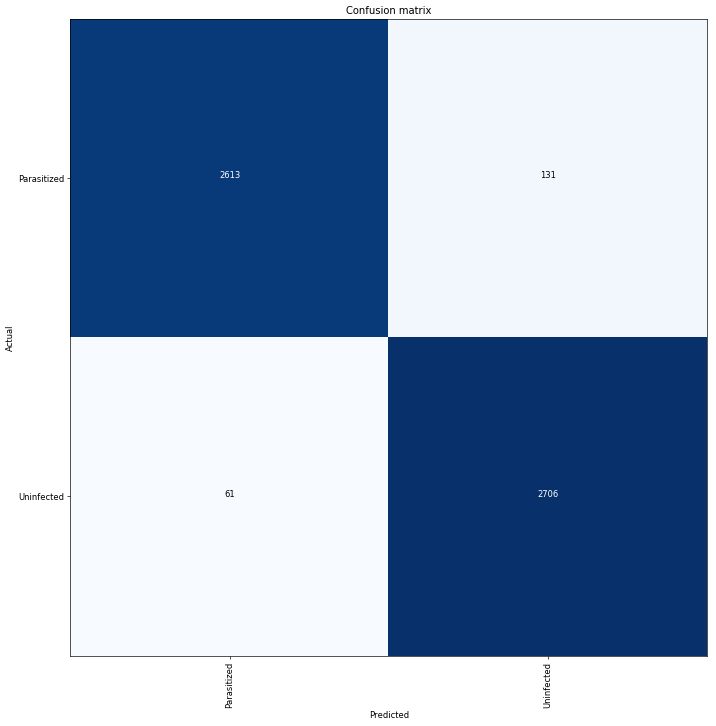

In [96]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)